In [131]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# Gather Data
## 1. Enhanced Twitter Archive

In [2]:
#Read in the We Rate Dogs Twitter Archive
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 2. Image Predictions File

In [3]:
# Use requests library to download tsv file from a website
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read in tsv file as a Pandas DataFrame    
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
df_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3. Download Tweet Json Data

In [4]:
# use tweepy to query Twitter's API and hide the API info here
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [5]:
# Use Twitter API to collect status data
tweet_ids = list(df_twitter_archive.tweet_id)

tweet_data = []
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, 
                              wait_on_rate_limit=True,
                              wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
        
    except:
        print("Error:" + str(tweet))

Error:892420643555336193
Error:892177421306343426
Error:891815181378084864
Error:891689557279858688
Error:891327558926688256
Error:891087950875897856
Error:890971913173991426
Error:890729181411237888
Error:890609185150312448
Error:890240255349198849
Error:890006608113172480
Error:889880896479866881
Error:889665388333682689
Error:889638837579907072
Error:889531135344209921
Error:889278841981685760
Error:888917238123831296
Error:888804989199671297
Error:888554962724278272
Error:888202515573088257
Error:888078434458587136
Error:887705289381826560
Error:887517139158093824
Error:887473957103951883
Error:887343217045368832
Error:887101392804085760
Error:886983233522544640
Error:886736880519319552
Error:886680336477933568
Error:886366144734445568
Error:886267009285017600
Error:886258384151887873
Error:886054160059072513
Error:885984800019947520
Error:885528943205470208
Error:885518971528720385
Error:885311592912609280
Error:885167619883638784
Error:884925521741709313
Error:884876753390489601


In [6]:
tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))
#print out one json object for further reference 
tweets[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [7]:
#creat a list of data from tweet_json.txt
tweets_list = []
for json_data in tweets:
    tweets_list.append({'tweet_id' : json_data['id'],
                       'retweet_count': int(json_data['retweet_count']),
                       'favorite_count' : int(json_data['favorite_count'])})
   
#creat a Dataframe
df_tweets = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweet_count' , 'favorite_count']) 
#Check out the obatined DataFrame
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assess Data

We have 3 datasets:
* df_twitter_archive : Tweet's text, dog category and the rating
* df_image_predictions : different dog breed's images
* df_tweets : ids, retweets and favorite counts

### Dataset 1 - twitter_archive


In [8]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
df_twitter_archive.name.value_counts().head()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Name: name, dtype: int64

In [15]:
df_twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
df_twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
df_twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
df_twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Dataset 2 - image_predications

In [19]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
df_image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [23]:
df_image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [24]:
df_image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [25]:
df_image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Dataset 3 - tweets

In [26]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [27]:
df_tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [28]:
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Quality Issues

* Columns:in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,  retweeted_status_timestamp variables have lots of missing data.
* Rating_denominator is not always 10. Only 2333 cases out 2356 cases has rating_denominator 10.
* Rating_numerator has different values but in most cases between 0-15. Consider other number as outliers.
* Name cloumn has 745 null values and 55 with just non-standard value 'a'.
* timestamp column is not in proper datetime format.
* Some values in expanded_url are missing and duplicate.
* Name column has some values starting with upper case while some with lower case.
* The columns'names are not clear and just referred as p1,p2,p3.

## Tidiness Issues

* Dog stage variable into four different columns.
* 3 different data sets. tweet_data should be merched into archive table.

# Clean Data

We want to create one high quality date so merging three different datasets to one would be ideal approach. 

In [67]:
#Merge three datasets to one and save in df_master dataset
df_master = pd.merge(df_twitter_archive,df_image_predictions)
df_master = pd.merge(df_master,df_tweets)
df_master.to_csv('df_master.csv', encoding = 'utf-8')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

In [69]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


#### 1. Drop the columns; in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp as they have lots of missing values.

In [70]:
df_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1, inplace =True)
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [71]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null obj

#### 2. Convert 'timestamp' from string to datetime format.

In [72]:
df_master['timestamp']=pd.to_datetime(df_master['timestamp'])
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


#### 3. Place four different dog stage categories into one column 'dog_stage'.

In [73]:
#create one column 'dog_stage' by extracting 4 different variables from the table
df_master['dog_stage'] = df_master['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [74]:
# Drop the 4 columns that are no longer required in the table
df_master.drop(['puppo','pupper','floofer','doggo'],axis=1, inplace=True)

In [75]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,NaN


#### 4. Change the source column from long url links by extracting <a href....</a> and only display the category.

In [76]:
df_master.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2032
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [77]:
df_master['source'] = df_master['source'].str.extract('^<a.+>(.+)</a>$')

In [78]:
df_master.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
1096,707021089608753152,2016-03-08 01:52:18,Twitter for iPhone,This is Tucker. He's a Dasani Episcopalian. Go...,https://twitter.com/dog_rates/status/707021089...,12,10,Tucker,https://pbs.twimg.com/media/Cc_XtkRW8AEE7Fn.jpg,2,...,True,golden_retriever,0.314673,True,Pekinese,0.066672,True,1540,4433,NaN
1279,690735892932222976,2016-01-23 03:20:44,Twitter for iPhone,Say hello to Peaches. She's a Dingleberry Zand...,https://twitter.com/dog_rates/status/690735892...,13,10,Peaches,https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg,1,...,True,Labrador_retriever,0.109635,True,kuvasz,0.002795,True,1442,4134,NaN
1285,690374419777196032,2016-01-22 03:24:22,Twitter for iPhone,This is Phred. He's an Albanian Flepperkush. T...,https://twitter.com/dog_rates/status/690374419...,11,10,Phred,https://pbs.twimg.com/media/CZSz3vWXEAACElU.jpg,1,...,True,Labrador_retriever,0.107144,True,ice_bear,0.085086,False,972,3560,NaN
569,785170936622350336,2016-10-09 17:31:53,Twitter for iPhone,This is Hero. He was enjoying the car ride unt...,https://twitter.com/dog_rates/status/785170936...,11,10,Hero,https://pbs.twimg.com/media/CuV8yfxXEAAUlye.jpg,2,...,False,Eskimo_dog,0.027494,True,Samoyed,0.019530,True,5639,13491,NaN
353,819347104292290561,2017-01-12 00:55:47,Twitter for iPhone,Say hello to Anna and Elsa. They fall asleep i...,https://twitter.com/dog_rates/status/819347104...,12,10,Anna,https://pbs.twimg.com/media/C17n1nrWQAIErU3.jpg,3,...,True,black-and-tan_coonhound,0.044120,True,Doberman,0.031835,True,1383,8008,NaN
482,798665375516884993,2016-11-15 23:13:58,Twitter for iPhone,RT @dog_rates: This is Lola. She fell asleep o...,https://twitter.com/dog_rates/status/671896809...,10,10,Lola,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,...,True,hamster,0.227150,False,Pomeranian,0.056057,True,4519,0,NaN
1333,687127927494963200,2016-01-13 04:23:58,Twitter for iPhone,Meet Gordon. He's an asshole. 9/10 would still...,https://twitter.com/dog_rates/status/687127927...,9,10,Gordon,https://pbs.twimg.com/media/CYkrNIVWcAMswmP.jpg,1,...,True,Chihuahua,0.149164,True,Shih-Tzu,0.120505,True,2591,6004,NaN
1880,669567591774625800,2015-11-25 17:25:28,Twitter for iPhone,Meet Kollin. He's a Parakeetian Badminton from...,https://twitter.com/dog_rates/status/669567591...,9,10,Kollin,https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg,1,...,True,toy_terrier,0.009166,True,miniature_pinscher,0.002659,True,61,248,NaN
93,871032628920680449,2017-06-03 15:55:36,Twitter for iPhone,This is Boomer. He's doing an advanced water t...,https://twitter.com/dog_rates/status/871032628...,13,10,Boomer,https://pbs.twimg.com/media/DBaHi3YXgAE6knM.jpg,1,...,True,macaque,0.068955,False,dingo,0.050602,False,3999,23255,NaN
711,761227390836215808,2016-08-04 15:48:47,Twitter for iPhone,This is Albert. He just found out that bees ar...,https://twitter.com/dog_rates/status/761227390...,10,10,Albert,https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg,1,...,False,French_bulldog,0.280802,True,boxer,0.054523,True,1775,5908,NaN


#### 5. Drop tweets with rating denominator NOT equal to 10.

In [79]:
# display denominators
df_master.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        1
11        2
10     2055
7         1
2         1
Name: rating_denominator, dtype: int64

In [80]:
df_master = df_master[df_master.rating_denominator == 10]

In [81]:
#check the values
df_master.rating_denominator.value_counts().sort_index(ascending = False)

10    2055
Name: rating_denominator, dtype: int64

#### 6. Drop tweets with rating numerator higher than 15.

In [82]:
df_master.rating_numerator.value_counts()

12      473
10      429
11      413
13      283
9       150
8        95
7        51
14       40
5        34
6        32
3        19
4        15
2         9
1         4
0         2
75        1
26        1
420       1
27        1
15        1
1776      1
Name: rating_numerator, dtype: int64

In [83]:
df_master = df_master[df_master.rating_numerator < 15]

In [84]:
df_master.rating_numerator.value_counts().sort_index(ascending = False)

14     40
13    283
12    473
11    413
10    429
9     150
8      95
7      51
6      32
5      34
4      15
3      19
2       9
1       4
0       2
Name: rating_numerator, dtype: int64

#### 7. Place dog breed in one column and drop unwanted columns

In [85]:
# Code Tidy: Consulidating image prediction into one column
df_master['dog_breed1'] = df_master[df_master['p1_dog'] == True].p1
df_master['dog_breed2'] = df_master[((df_master['p1_dog'] == False) & (df_master['p2_dog'] == True))].p2
df_master['dog_breed3'] = df_master[((df_master['p1_dog'] == False) & (df_master['p2_dog'] == False) & (df_master['p3_dog'] == True))].p3
df_master['dog_breed'] = df_master[['dog_breed1','dog_breed2','dog_breed3']].fillna('').sum(axis=1)

In [86]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id              2049 non-null int64
timestamp             2049 non-null datetime64[ns]
source                2049 non-null object
text                  2049 non-null object
expanded_urls         2049 non-null object
rating_numerator      2049 non-null int64
rating_denominator    2049 non-null int64
name                  2049 non-null object
jpg_url               2049 non-null object
img_num               2049 non-null int64
p1                    2049 non-null object
p1_conf               2049 non-null float64
p1_dog                2049 non-null bool
p2                    2049 non-null object
p2_conf               2049 non-null float64
p2_dog                2049 non-null bool
p3                    2049 non-null object
p3_conf               2049 non-null float64
p3_dog                2049 non-null bool
retweet_count         2049 non-null int64
favorite_count        2049 non-nu

In [89]:
# Drop unneeded columns
df_master = df_master[['tweet_id', 'timestamp','source','text', 'dog_breed','dog_stage', 'name','rating_numerator', 'rating_denominator',
                                                       'favorite_count', 'retweet_count',]]

In [90]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2072
Data columns (total 11 columns):
tweet_id              2049 non-null int64
timestamp             2049 non-null datetime64[ns]
source                2049 non-null object
text                  2049 non-null object
dog_breed             2049 non-null object
dog_stage             329 non-null object
name                  2049 non-null object
rating_numerator      2049 non-null int64
rating_denominator    2049 non-null int64
favorite_count        2049 non-null int64
retweet_count         2049 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 192.1+ KB


#### 8. Replace all invalid values in name column with 'None'.

In [91]:
mask = df_master.name.str.contains('^[a-z]', regex = True)
df_master[mask].name.value_counts().sort_index()

a               54
actually         1
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
light            1
my               1
not              1
officially       1
one              4
quite            3
space            1
such             1
the              7
unacceptable     1
very             4
Name: name, dtype: int64

In [92]:
df_master.loc[mask, 'name'] = "None"

In [93]:
df_master[mask].name.value_counts().sort_index()

None    97
Name: name, dtype: int64

## Store Data

In [94]:
# Store the clean DataFrame in a CSV file
df_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [95]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 11 columns):
tweet_id              2049 non-null int64
timestamp             2049 non-null object
source                2049 non-null object
text                  2049 non-null object
dog_breed             1730 non-null object
dog_stage             329 non-null object
name                  2049 non-null object
rating_numerator      2049 non-null int64
rating_denominator    2049 non-null int64
favorite_count        2049 non-null int64
retweet_count         2049 non-null int64
dtypes: int64(5), object(6)
memory usage: 176.2+ KB


## Visualize Data

### Most Popular Breeds

Text(0,0.5,'Dog_breed')

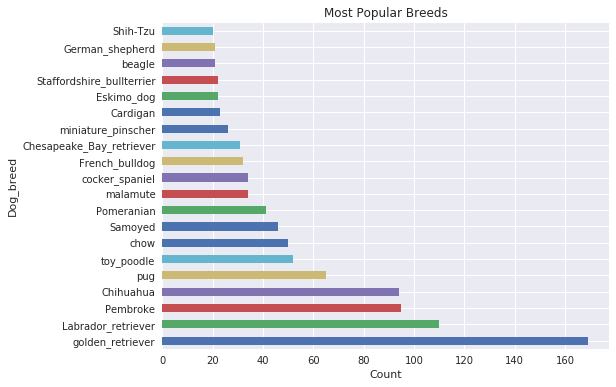

In [170]:
#plot top 20 breeds
df_breed = df_master.groupby('dog_breed').filter(lambda x: len(x) >= 20)
df_breed['dog_breed'].value_counts().plot(kind = 'barh', figsize = (8,6))
plt.title('Most Popular Breeds')
plt.xlabel('Count')
plt.ylabel('Dog_breed')

### Most popular Dog stage

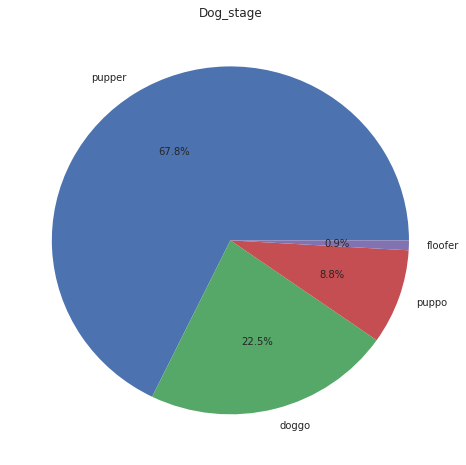

In [133]:
# plot pie chart of dog stages
df_master[df_master.dog_stage!='None'].dog_stage.value_counts().plot.pie(figsize = (8,8),autopct='%1.1f%%',title ='Dog_stage');
plt.ylabel('');

### Correlation between favorite and retweet counts

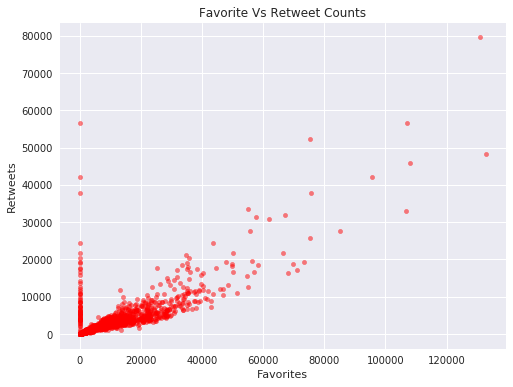

In [166]:
#plot chart to show the relationship between favorite and retweet counts
df_master.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', figsize= (8,6),alpha = 0.5, color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Favorite Vs Retweet Counts');

## Analysis

* The most popular dog breed from WeRateDogs is Golden Retriever followed by Labrador Retreiver.
* The most popular dog stage is pupper and the least is floofer.
* The correlation between favorite count and retweet count is positive. This determines that highly favorite dog corresponds to higher number of retweets.